## Notes 
### Required installing Oracle JAVA 8 to get javabridge installed
### Then, I was able to install py-causal from https://bd2kccd.github.io/docs/py-causal/
### GFCI is slower than RFCI, but more accurate (SPIRTES), GFCI and RFCI account for unobserved variables, FGES assumes no unobserved variables.

Structure Learning Performance Guarantees If the assumptions in the previous section hold, then in the large sample limit, the CBN structure output by GFCId will contain an edge of one of four kinds between Xand Y   if and only if Xand Yare not independent conditional on any subset of the other measured variables of less than or equal to a specified size. In addition, there is (1) an arc X->Y   if and only if Xdirectly or indirectly causes Y, and Y   does not directly or indirectly cause X; (2) an edge X <-->Y   if and only if X   is not a direct or indirect cause of Yand Y   is not a direct or indirect cause of X(which can only occur if there are latent confounders of Xand some other variable or Yand some other variable; (3) an edge Xo->Y   only if Yis not a direct or indirect cause of X, but Xmay or may not be an indirect cause of Y; (4) an edge X o–o Y   indicates that Xand Y   are dependent no matter what subset of observed variables is conditioned on, but contains no orientation information (X   may be a direct or indirect cause of Y, and Ymay be an indirect cause of X, or there may be a latent common cause of Xand Y.

In [ ]:
# This is for continous data.
# generate some toy data:
SIZE = 20000
a = np.random.normal(size=SIZE, scale = 1)
b = np.random.normal(size=SIZE, scale = 1)
c = np.random.normal(size=SIZE, scale = 1)
d = np.random.normal(size=SIZE, scale = 1)
e = np.random.normal(size=SIZE, scale = 1)

f= a + b + c + d + e + np.random.normal(size=SIZE, scale = 1)
g = f + np.random.normal(size=SIZE, scale = 1)

# load the data into a dataframe:
df = pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})
import pandas as pd
from pycausal.pycausal import pycausal as pc
from pycausal import search as s
pc = pc()
pc.start_vm(java_max_heap_size = '500M')
from pycausal import prior as p

tetrad = s.tetradrunner()
#GFCI = Greedy Fast Causal Interference (GFCI) 
# bdeu = Bayesian Dirichlet likelihood equivalence and uniform
tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)

import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)




In [ ]:
# let's try and predict D HERE

# This is for continous data.
# generate some toy data:
SIZE = 100000
a = np.random.normal(size=SIZE, scale = 1)
b = np.random.normal(size=SIZE, scale = 1)
c = np.random.normal(size=SIZE, scale = 1)
d = a + b + c + np.random.normal(size=SIZE, scale = 1)
e = d + np.random.normal(size=SIZE, scale = 1)
f= d + np.random.normal(size=SIZE, scale = 1)
g = d + np.random.normal(size=SIZE, scale = 1)

# load the data into a dataframe:
df = pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})
import pandas as pd
from pycausal.pycausal import pycausal as pc
from pycausal import search as s
pc = pc()
pc.start_vm(java_max_heap_size = '2500M')
from pycausal import prior as p

tetrad = s.tetradrunner()
#GFCI = Greedy Fast Causal Interference (GFCI) 
# bdeu = Bayesian Dirichlet likelihood equivalence and uniform
tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)

import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

In [ ]:
pc = pc()
pc.start_vm(java_max_heap_size = '500M')
from pycausal import prior as p

tetrad = s.tetradrunner()
#GFCI = Greedy Fast Causal Interference (GFCI) 
# bdeu = Bayesian Dirichlet likelihood equivalence and uniform
tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)

import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
print(len(graphs))
svg_str = graphs[0].create_svg()
SVG(svg_str)

# Trying some various ML models

In [18]:
#Synthetic data
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import pydot
from IPython.display import SVG

def gen_data():
    SIZE = 10000
    a = np.random.binomial(2, 0.5, size=SIZE)
    b = np.random.binomial(2, 0.5, size=SIZE)
    c = np.random.binomial(2, 0.5, size=SIZE)
    d = np.random.binomial(2, 0.5, size=SIZE)
    e = np.random.binomial(2, 0.5, size=SIZE)
    f= a + b + c + d + e + np.random.binomial(2, 0.5, size=SIZE)
    g = f + np.random.binomial(2, 0.5, size=SIZE)
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})


import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

def discrete_gauss(low, high, samples, std = 20):
    x = np.arange(low, high)
    xU, xL = x + 0.5, x - 0.5 
    prob = ss.norm.cdf(xU, scale = std) - ss.norm.cdf(xL, scale = std)
    prob = prob / prob.sum() #normalize the probabilities so their sum is 1
    nums = np.random.choice(x, size = samples, p = prob)
    return nums

def gen_data():
    SIZE = 40000
    a = discrete_gauss(-3,3, SIZE)
    b = discrete_gauss(-3,3, SIZE)
    c = discrete_gauss(-3,3, SIZE)
    d = discrete_gauss(-3,3, SIZE)
    e = discrete_gauss(-3,3, SIZE)
    f= a + b + c + d + e + np.random.binomial(2, 0.5, size=SIZE)
    g = f + discrete_gauss(-3,3, SIZE)

    #g[g < 0] = 0
    #g[g > 0] = 1
    #g[(g <= 3) & (g >= -3)] = 1
    #g[g < -3] = 0
    #g[g > 3] = 2
    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})

def gen_data():
    #SIZE = 40000
    SIZE = 40000
    a = np.random.normal(0, 1, SIZE)
    b = np.random.normal(0, 1, SIZE)
    c = np.random.normal(0, 1, SIZE)
    d = np.random.normal(0, 1, SIZE)
    e = np.random.normal(0, 1, SIZE)
    f= a + b + c + d + e + np.random.normal(0, 1, SIZE)
    g = f + np.random.normal(0, 1, SIZE)
    g = np.rint(g)
    #m = np.mean(g)
    #g[g < m] = 0
    #g[g >= m] = 1

    return pd.DataFrame({'a' : a,'b' : b, 'c' : c, 'd' : d,'e' : e,'f':f, 'g':g})

df = gen_data()



import numpy as np
import matplotlib.pyplot as plt
def bar_plot(x_ax, val1, val1std, val2, val2std):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ## the data
    N = len(x_ax)

    ## necessary variables
    ind = np.arange(N)                # the x locations for the groups
    width = 0.35                      # the width of the bars
    fig.set_size_inches(18.5, 10.5)
    ## the bars
    rects1 = ax.bar(ind, val1, width,
                    color='gray',
                    yerr=val1std,
                    error_kw=dict(elinewidth=2,ecolor='blue'))

    rects2 = ax.bar(ind+width, val2, width,
                        color='blue',
                        #yerr=val2std,
                        error_kw=dict(elinewidth=2,ecolor='gray'))

    # axes and labels
    ax.set_xlim(-width,len(ind)+width)
    #ax.set_ylim(0,45)
    ax.set_ylabel('Percentage')
    ax.set_title('')
    plt.xticks(ind + width / 2, x_ax, rotation=75, size = 14)
    ## add a legend
    ax.legend( (rects1[0], rects2[0]), ('Accuracy', '% Violations') )
    fig.savefig("violations.pdf", bbox_inches='tight')
    plt.show()


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=40.
  % (min_groups, self.n_splits)), Warning)


Error: LogisticRegression() 0.26279527559055116


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.20078740157480315
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.27263779527559057
Error: LinearSVC() 0.30708661417322836
Error: GaussianNB() 0.35826771653543305
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.25393700787401574


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.37696850393700787
Error: RandomForestClassifier() 0.31200787401574803
Error: ExtraTreesClassifier() 0.296259842519685
Error: AdaBoostClassifier() 0.2637795275590551
Error: BaggingClassifier() 0.296259842519685
Error: GradientBoostingClassifier() 0.3661417322834646
Error: MLPClassifier() 0.3641732283464567
Error: LogisticRegression() 0.26528599605522685


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.17258382642998027
Violation: {'f'} {'d', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.2534516765285996
Error: LinearSVC() 0.3145956607495069
Error: GaussianNB() 0.3668639053254438
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2593688362919132


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.36489151873767256
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: RandomForestClassifier() 0.3136094674556213
Error: ExtraTreesClassifier() 0.28303747534516766
Error: AdaBoostClassifier() 0.22090729783037474
Error: BaggingClassifier() 0.2958579881656805
Error: GradientBoostingClassifier() 0.35700197238658776
Error: MLPClassifier() 0.35009861932938857
Error: LogisticRegression() 0.2744323790720632


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.23000987166831194
Error: DecisionTreeClassifier() 0.2744323790720632
Error: LinearSVC() 0.3139190523198421
Error: GaussianNB() 0.3455083909180652
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.228035538005923
Error: LinearDiscriminantAnalysis() 0.351431391905232
Error: RandomForestClassifier() 0.3139190523198421
Error: ExtraTreesClassifier() 0.29318854886475815
Error: AdaBoostClassifier() 0.24679170779861798
Error: BaggingClassifier() 0.31786771964461996
Error: GradientBoostingClassifier() 0.35735439289239884
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: MLPClassifier() 0.33859822309970383
Error: LogisticRegression() 0.2816205533596838


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2628458498023715
Violation: {'f'} {'d', 'f', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.25889328063241107
Error: LinearSVC() 0.3092885375494071
Error: GaussianNB() 0.39920948616600793
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2509881422924901
Error: LinearDiscriminantAnalysis() 0.4031620553359684
Error: RandomForestClassifier() 0.30138339920948615
Error: ExtraTreesClassifier() 0.31521739130434784
Error: AdaBoostClassifier() 0.23122529644268774
Error: BaggingClassifier() 0.3181818181818182
Error: GradientBoostingClassifier() 0.3705533596837945
Error: MLPClassifier() 0.39920948616600793
Error: LogisticRegression() 0.25742574257425743


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.20693069306930692
Error: DecisionTreeClassifier() 0.2316831683168317
Error: LinearSVC() 0.29504950495049503
Error: GaussianNB() 0.32772277227722774
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2396039603960396
Error: LinearDiscriminantAnalysis() 0.3415841584158416


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: RandomForestClassifier() 0.3287128712871287
Error: ExtraTreesClassifier() 0.28217821782178215
Error: AdaBoostClassifier() 0.25742574257425743
Error: BaggingClassifier() 0.3188118811881188
Violation: {'f'} {'d', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: GradientBoostingClassifier() 0.32574257425742575
Error: MLPClassifier() 0.32772277227722774
Error: LogisticRegression() 0.2633663366336634


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2
Error: DecisionTreeClassifier() 0.27524752475247527
Error: LinearSVC() 0.299009900990099
Error: GaussianNB() 0.38514851485148516
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.24356435643564356


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.3891089108910891
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: RandomForestClassifier() 0.32475247524752476
Error: ExtraTreesClassifier() 0.31386138613861386
Error: AdaBoostClassifier() 0.25544554455445545
Error: BaggingClassifier() 0.3089108910891089
Error: GradientBoostingClassifier() 0.3693069306930693
Error: MLPClassifier() 0.3702970297029703
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: LogisticRegression() 0.2732673267326733
Violation: {'f'} {'d', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.201980198019802
Error: DecisionTreeClassifier() 0.24752475247524752
Error: LinearSVC() 0.296039603960396
Error: GaussianNB() 0.3712871287128713
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.24455445544554455
Error: LinearDiscriminantAnalysis() 0.3693069306930693


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: RandomForestClassifier() 0.299009900990099
Error: ExtraTreesClassifier() 0.30396039603960395
Error: AdaBoostClassifier() 0.25643564356435644
Error: BaggingClassifier() 0.30198019801980197
Error: GradientBoostingClassifier() 0.3613861386138614
Error: MLPClassifier() 0.37524752475247525
Error: LogisticRegression() 0.2933597621407334


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.12388503468780972
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.27849355797819625
Error: LinearSVC() 0.3072348860257681
Error: GaussianNB() 0.3676907829534192
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2616451932606541


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.3815659068384539
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: RandomForestClassifier() 0.30426164519326065
Error: ExtraTreesClassifier() 0.3260654112983152
Error: AdaBoostClassifier() 0.2527254707631318
Error: BaggingClassifier() 0.2993062438057483
Error: GradientBoostingClassifier() 0.35777998017839446
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: MLPClassifier() 0.38354806739345887
Error: LogisticRegression() 0.2837301587301587


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.11210317460317461
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.29464285714285715
Error: LinearSVC() 0.3005952380952381
Error: GaussianNB() 0.35119047619047616
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2777777777777778
Error: LinearDiscriminantAnalysis() 0.34424603174603174
Error: RandomForestClassifier() 0.30853174603174605
Error: ExtraTreesClassifier() 0.29464285714285715
Error: AdaBoostClassifier() 0.26587301587301587
Error: BaggingClassifier() 0.30456349206349204
Error: GradientBoostingClassifier() 0.35714285714285715
Error: MLPClassifier() 0.35813492063492064
Error: LogisticRegression() 0.2753479125248509


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.20377733598409542
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.2634194831013916
Error: LinearSVC() 0.30218687872763417
Error: GaussianNB() 0.352882703777336
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.24353876739562624
Violation: {'f'} {'f', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: LinearDiscriminantAnalysis() 0.34691848906560635


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: RandomForestClassifier() 0.3091451292246521
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: ExtraTreesClassifier() 0.30218687872763417
Error: AdaBoostClassifier() 0.25944333996023855
Error: BaggingClassifier() 0.31709741550695825
Error: GradientBoostingClassifier() 0.3220675944333996
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: MLPClassifier() 0.3379721669980119
Error: LogisticRegression() 0.2845771144278607


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1691542288557214
Error: DecisionTreeClassifier() 0.2676616915422886
Error: LinearSVC() 0.3004975124378109
Error: GaussianNB() 0.36218905472636814
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2417910447761194


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.36218905472636814
Error: RandomForestClassifier() 0.32139303482587067
Error: ExtraTreesClassifier() 0.2766169154228856
Error: AdaBoostClassifier() 0.25970149253731345
Error: BaggingClassifier() 0.309452736318408
Error: GradientBoostingClassifier() 0.3562189054726368
Error: MLPClassifier() 0.3611940298507463
Error: LogisticRegression() 0.2951146560319043


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.2033898305084746
Error: DecisionTreeClassifier() 0.2642073778664008
Error: LinearSVC() 0.317048853439681
Error: GaussianNB() 0.34795613160518446
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2472582253240279
Error: LinearDiscriminantAnalysis() 0.3629112662013958
Error: RandomForestClassifier() 0.2951146560319043
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: ExtraTreesClassifier() 0.2851445663010967
Error: AdaBoostClassifier() 0.2741774675972084
Error: BaggingClassifier() 0.29910269192422734
Error: GradientBoostingClassifier() 0.34995014955134596
Error: MLPClassifier() 0.3369890329012961
Error: LogisticRegression() 0.28215353938185445


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.17846460618145563
Error: DecisionTreeClassifier() 0.26819541375872386
Error: LinearSVC() 0.29112662013958124
Error: GaussianNB() 0.357926221335992
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2432701894317049
Error: LinearDiscriminantAnalysis() 0.35194416749750745
Error: RandomForestClassifier() 0.30109670987038883
Error: ExtraTreesClassifier() 0.3230309072781655
Error: AdaBoostClassifier() 0.2522432701894317
Error: BaggingClassifier() 0.2741774675972084
Error: GradientBoostingClassifier() 0.33300099700897307
Error: MLPClassifier() 0.34995014955134596
Error: LogisticRegression() 0.28614157527417744


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.22033898305084745
Error: DecisionTreeClassifier() 0.24027916251246262
Error: LinearSVC() 0.29910269192422734
Error: GaussianNB() 0.35992023928215355
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2432701894317049
Error: LinearDiscriminantAnalysis() 0.353938185443669
Violation: {'f'} {'a', 'd', 'f', 'c', 'e'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: RandomForestClassifier() 0.30309072781655033
Error: ExtraTreesClassifier() 0.2901296111665005
Error: AdaBoostClassifier() 0.27218344965104685
Error: BaggingClassifier() 0.3040877367896311
Error: GradientBoostingClassifier() 0.3629112662013958
Violation: {'f'} {'a', 'd', 'f', 'c', 'e'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: MLPClassifier() 0.36390827517447655
Error: LogisticRegression() 0.26447105788423153


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.14570858283433133
Violation: {'f'} {'d', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.27245508982035926
Error: LinearSVC() 0.2884231536926148
Error: GaussianNB() 0.36926147704590817
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.23652694610778444


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.3772455089820359
Error: RandomForestClassifier() 0.3283433133732535
Error: ExtraTreesClassifier() 0.29241516966067865
Error: AdaBoostClassifier() 0.25149700598802394
Error: BaggingClassifier() 0.33632734530938124
Error: GradientBoostingClassifier() 0.35728542914171657
Error: MLPClassifier() 0.36826347305389223
Error: LogisticRegression() 0.256


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.186
Violation: {'f'} {'c', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.241
Error: LinearSVC() 0.286
Error: GaussianNB() 0.353
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.232
Error: LinearDiscriminantAnalysis() 0.364


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: RandomForestClassifier() 0.304
Error: ExtraTreesClassifier() 0.285
Error: AdaBoostClassifier() 0.262
Error: BaggingClassifier() 0.296
Error: GradientBoostingClassifier() 0.346
Error: MLPClassifier() 0.346
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: LogisticRegression() 0.283


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.205
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.267
Error: LinearSVC() 0.295
Error: GaussianNB() 0.36
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.224


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.372
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: RandomForestClassifier() 0.3
Error: ExtraTreesClassifier() 0.287
Error: AdaBoostClassifier() 0.259
Error: BaggingClassifier() 0.29
Error: GradientBoostingClassifier() 0.36
Error: MLPClassifier() 0.356
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: LogisticRegression() 0.2665330661322645


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.16432865731462926
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.2955911823647295
Error: LinearSVC() 0.312625250501002
Error: GaussianNB() 0.39879759519038077
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2575150300601202
Error: LinearDiscriminantAnalysis() 0.3897795591182365
Error: RandomForestClassifier() 0.2935871743486974
Error: ExtraTreesClassifier() 0.31162324649298595
Error: AdaBoostClassifier() 0.26452905811623245
Error: BaggingClassifier() 0.3016032064128257
Error: GradientBoostingClassifier() 0.3687374749498998
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: MLPClassifier() 0.3787575150300601
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: LogisticRegression() 0.25851703406813625


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1432865731462926
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.26452905811623245
Error: LinearSVC() 0.2755511022044088
Error: GaussianNB() 0.3306613226452906
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.24949899799599198
Error: LinearDiscriminantAnalysis() 0.3336673346693387
Error: RandomForestClassifier() 0.2905811623246493
Error: ExtraTreesClassifier() 0.29458917835671344
Error: AdaBoostClassifier() 0.2575150300601202
Error: BaggingClassifier() 0.2835671342685371
Error: GradientBoostingClassifier() 0.32965931863727455
Error: MLPClassifier() 0.32665330661322645
Error: LogisticRegression() 0.27354709418837675


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.13827655310621242
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.2565130260521042
Error: LinearSVC() 0.29158316633266534
Error: GaussianNB() 0.3376753507014028
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.24348697394789579
Error: LinearDiscriminantAnalysis() 0.32965931863727455
Error: RandomForestClassifier() 0.28557114228456915
Error: ExtraTreesClassifier() 0.2965931863727455
Error: AdaBoostClassifier() 0.2605210420841683
Error: BaggingClassifier() 0.3066132264529058
Error: GradientBoostingClassifier() 0.3316633266533066
Error: MLPClassifier() 0.3276553106212425
Error: LogisticRegression() 0.2728184553660983
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: Perceptron() 0.20160481444332998


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Violation: {'f'} {'c', 'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.283851554663992
Error: LinearSVC() 0.29889669007021064
Error: GaussianNB() 0.35807422266800404
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.24674022066198595


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.37011033099297896
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: RandomForestClassifier() 0.30892678034102306
Error: ExtraTreesClassifier() 0.2888665997993982
Error: AdaBoostClassifier() 0.25576730190571717
Error: BaggingClassifier() 0.32698094282848544
Error: GradientBoostingClassifier() 0.36108324974924777
Error: MLPClassifier() 0.35907723169508526
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: LogisticRegression() 0.275827482447342


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.18956870611835505
Error: DecisionTreeClassifier() 0.2768304914744233
Error: LinearSVC() 0.3049147442326981
Error: GaussianNB() 0.37011033099297896
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.242728184553661


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.3791374122367101
Error: RandomForestClassifier() 0.32196589769307926
Error: ExtraTreesClassifier() 0.31795386158475425
Error: AdaBoostClassifier() 0.2547642928786359
Error: BaggingClassifier() 0.31795386158475425
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: GradientBoostingClassifier() 0.3721163490471414
Error: MLPClassifier() 0.39117352056168503
Violation: {'f'} {'d', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: LogisticRegression() 0.2688064192577733


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.20361083249749248
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.25576730190571717
Error: LinearSVC() 0.2958876629889669
Error: GaussianNB() 0.3530591775325978
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.24373119358074222


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.3630892678034102
Violation: {'f'} {'d', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: RandomForestClassifier() 0.3029087261785356
Error: ExtraTreesClassifier() 0.30792377131394183
Error: AdaBoostClassifier() 0.24974924774322968
Error: BaggingClassifier() 0.3159478435305918
Error: GradientBoostingClassifier() 0.35606820461384153
Error: MLPClassifier() 0.36810431293881646
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: LogisticRegression() 0.2577733199598796


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.23570712136409228
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.26178535606820463
Error: LinearSVC() 0.2888665997993982
Error: GaussianNB() 0.3901705115346038
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.25175526579739216


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.37612838515546637
Error: RandomForestClassifier() 0.316950852557673
Error: ExtraTreesClassifier() 0.3069207622868606
Error: AdaBoostClassifier() 0.23771313941825475
Error: BaggingClassifier() 0.3029087261785356
Error: GradientBoostingClassifier() 0.36609829488465395
Error: MLPClassifier() 0.35707121364092276
Error: LogisticRegression() 0.28112449799196787


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.10140562248995984
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.2781124497991968
Error: LinearSVC() 0.3142570281124498
Error: GaussianNB() 0.37349397590361444
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.25


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.36947791164658633
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: RandomForestClassifier() 0.32831325301204817
Error: ExtraTreesClassifier() 0.29116465863453816
Error: AdaBoostClassifier() 0.26305220883534136
Error: BaggingClassifier() 0.3132530120481928
Error: GradientBoostingClassifier() 0.357429718875502
Error: MLPClassifier() 0.37650602409638556
Error: LogisticRegression() 0.2542713567839196


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.19396984924623115
Error: DecisionTreeClassifier() 0.27537688442211056
Error: LinearSVC() 0.2804020100502513
Error: GaussianNB() 0.3698492462311558
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.25125628140703515
Error: LinearDiscriminantAnalysis() 0.3829145728643216
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: RandomForestClassifier() 0.31256281407035175
Error: ExtraTreesClassifier() 0.2974874371859296
Error: AdaBoostClassifier() 0.25125628140703515
Error: BaggingClassifier() 0.3085427135678392
Error: GradientBoostingClassifier() 0.36180904522613067
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: MLPClassifier() 0.36180904522613067
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: LogisticRegression

/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.176056338028169
Violation: {'f'} {'e', 'f', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.24949698189134809
Error: LinearSVC() 0.2947686116700201
Error: GaussianNB() 0.3762575452716298
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.25653923541247486


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Error: LinearDiscriminantAnalysis() 0.3682092555331992
Error: RandomForestClassifier() 0.2887323943661972
Error: ExtraTreesClassifier() 0.3028169014084507
Error: AdaBoostClassifier() 0.26961770623742454
Error: BaggingClassifier() 0.32293762575452717
Error: GradientBoostingClassifier() 0.36619718309859156
Error: MLPClassifier() 0.3762575452716298
Error: LogisticRegression() 0.27794561933534745


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.18328298086606243
Violation: {'f'} {'e'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.26686807653575023
Error: LinearSVC() 0.30614300100704933
Error: GaussianNB() 0.3333333333333333
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2406847935548842
Error: LinearDiscriminantAnalysis() 0.3403826787512588
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: RandomForestClassifier() 0.31319234642497484
Error: ExtraTreesClassifier() 0.283987915407855
Error: AdaBoostClassifier() 0.2618328298086606
Error: BaggingClassifier() 0.3011077542799597
Error: GradientBoostingClassifier() 0.33131923464249746
Error: MLPClassifier() 0.3544813695871098
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: LogisticRegression() 0.2759315206445116


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.17220543806646527
Error: DecisionTreeClassifier() 0.24370594159113795
Error: LinearSVC() 0.2930513595166163
Error: GaussianNB() 0.37865055387714
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2578046324269889
Error: LinearDiscriminantAnalysis() 0.3867069486404834
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: RandomForestClassifier() 0.28298086606243705
Error: ExtraTreesClassifier() 0.29506545820745217
Error: AdaBoostClassifier() 0.25579053373615307
Error: BaggingClassifier() 0.3021148036253776
Error: GradientBoostingClassifier() 0.34441087613293053
Error: MLPClassifier() 0.36153071500503525
Error: LogisticRegression() 0.26686807653575023


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1772406847935549
Error: DecisionTreeClassifier() 0.2688821752265861
Violation: set() {'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: LinearSVC() 0.297079556898288
Violation: set() {'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: GaussianNB() 0.36656596173212486
Violation: set() {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.25579053373615307
Violation: set() {'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: LinearDiscriminantAnalysis() 0.3675730110775428
Violation: set() {'a', 'd', 'f', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: RandomForestClassifier() 0.32326283987915405
Violation: set() {'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: ExtraTreesClassifier() 0.33434038267875127
Violation: set() {'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: AdaBoostClassifier() 0.256797583081

/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1581067472306143
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.26686807653575023
Error: LinearSVC() 0.30513595166163143
Error: GaussianNB() 0.35347432024169184
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.24874118831822759
Error: LinearDiscriminantAnalysis() 0.351460221550856
Error: RandomForestClassifier() 0.31319234642497484
Error: ExtraTreesClassifier() 0.3121852970795569
Error: AdaBoostClassifier() 0.2628398791540785
Error: BaggingClassifier() 0.3001007049345418
Error: GradientBoostingClassifier() 0.33434038267875127
Error: MLPClassifier() 0.3595166163141994
Error: LogisticRegression() 0.256797583081571


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1973816717019134
Error: DecisionTreeClassifier() 0.23967774420946628
Error: LinearSVC() 0.29003021148036257
Error: GaussianNB() 0.34843907351460224
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2537764350453172
Error: LinearDiscriminantAnalysis() 0.35750251762336355
Error: RandomForestClassifier() 0.311178247734139
Error: ExtraTreesClassifier() 0.31017119838872104
Error: AdaBoostClassifier() 0.2457200402819738
Error: BaggingClassifier() 0.31722054380664655
Error: GradientBoostingClassifier() 0.3393756294058409
Violation: {'f'} {'d', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: MLPClassifier() 0.3544813695871098
Error: LogisticRegression() 0.26586102719033233


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.18932527693857
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.27391742195367574
Error: LinearSVC() 0.2809667673716012
Error: GaussianNB() 0.337361530715005
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.25176233635448136
Error: LinearDiscriminantAnalysis() 0.3504531722054381
Error: RandomForestClassifier() 0.2940584088620342
Error: ExtraTreesClassifier() 0.3041289023162135
Error: AdaBoostClassifier() 0.26586102719033233
Error: BaggingClassifier() 0.3081570996978852
Error: GradientBoostingClassifier() 0.34843907351460224
Error: MLPClassifier() 0.338368580060423
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: LogisticRegression() 0.2729103726082578


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.18932527693857
Error: DecisionTreeClassifier() 0.2719033232628399
Error: LinearSVC() 0.2799597180261833
Error: GaussianNB() 0.3464249748237664
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2628398791540785
Error: LinearDiscriminantAnalysis() 0.33434038267875127
Error: RandomForestClassifier() 0.31017119838872104
Error: ExtraTreesClassifier() 0.30614300100704933
Error: AdaBoostClassifier() 0.25478348439073517
Error: BaggingClassifier() 0.3001007049345418
Error: GradientBoostingClassifier() 0.3333333333333333
Error: MLPClassifier() 0.3434038267875126
Error: LogisticRegression() 0.2628398791540785
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.19838872104733132
Error: DecisionTreeClassifier() 0.27794561933534745
Error: LinearSVC() 0.27794561933534745
Error: GaussianNB() 0.3595166163141994
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2255790533736153
Error: LinearDiscriminantAnalysis() 0.34541792547834843
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: RandomForestClassifier() 0.3121852970795569
Error: ExtraTreesClassifier() 0.29607250755287007
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: AdaBoostClassifier() 0.24269889224572003
Error: BaggingClassifier() 0.3011077542799597
Error: GradientBoostingClassifier() 0.34843907351460224
Error: MLPClassifier() 0.3544813695871098
Error: LogisticRegression() 0.2648539778449144


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.162134944612286
Violation: {'f'} {'a', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.26686807653575023
Error: LinearSVC() 0.297079556898288
Error: GaussianNB() 0.3766364551863041
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2527693856998993
Error: LinearDiscriminantAnalysis() 0.37865055387714
Violation: {'f'} {'a', 'd', 'f', 'c', 'e'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: RandomForestClassifier() 0.29003021148036257
Error: ExtraTreesClassifier() 0.2880161127895267
Error: AdaBoostClassifier() 0.25579053373615307
Error: BaggingClassifier() 0.3041289023162135
Error: GradientBoostingClassifier() 0.337361530715005
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: MLPClassifier() 0.3756294058408862
Violation: {'f'} {'f', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.1732124874118832
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.27895266868076535
Error: LinearSVC() 0.2799597180261833
Error: GaussianNB() 0.33534743202416917
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.2457200402819738
Error: LinearDiscriminantAnalysis() 0.3393756294058409
Error: RandomForestClassifier() 0.3031218529707956
Error: ExtraTreesClassifier() 0.297079556898288
Error: AdaBoostClassifier() 0.2688821752265861
Error: BaggingClassifier() 0.3001007049345418
Error: GradientBoostingClassifier() 0.34441087613293053
Error: MLPClassifier() 0.33434038267875127
Error: LogisticRegression() 0.2628398791540785


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.18328298086606243
Error: DecisionTreeClassifier() 0.2618328298086606
Error: LinearSVC() 0.2990936555891239
Error: GaussianNB() 0.3806646525679758
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.24269889224572003
Error: LinearDiscriminantAnalysis() 0.38972809667673713
Error: RandomForestClassifier() 0.33031218529707956
Error: ExtraTreesClassifier() 0.31822759315206445
Error: AdaBoostClassifier() 0.23867069486404835
Error: BaggingClassifier() 0.3121852970795569
Error: GradientBoostingClassifier() 0.3544813695871098
Error: MLPClassifier() 0.364551863041289
Error: LogisticRegression() 0.2598187311178248


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Error: Perceptron() 0.20443101711983888
Error: DecisionTreeClassifier() 0.2719033232628399
Error: LinearSVC() 0.28600201409869086
Error: GaussianNB() 0.38469284994964753
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.23766364551863042
Error: LinearDiscriminantAnalysis() 0.3877139979859013
Error: RandomForestClassifier() 0.3021148036253776
Error: ExtraTreesClassifier() 0.3031218529707956
Error: AdaBoostClassifier() 0.26586102719033233
Error: BaggingClassifier() 0.3021148036253776
Error: GradientBoostingClassifier() 0.35347432024169184
Violation: {'f'} {'e', 'f'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: MLPClassifier() 0.38469284994964753
Error: LogisticRegression() 0.2497482376636455
Violation: {'f'} {'a', 'd', 'f', 'c', 'e'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: Perceptron() 0.13695871097683787


/home/tkyono/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: DecisionTreeClassifier() 0.27391742195367574
Error: LinearSVC() 0.28197381671701915
Violation: {'f'} set() g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: GaussianNB() 0.3504531722054381
Violation: {'f'} {'a', 'd', 'f', 'c', 'e', 'b'} g <pycausal.pycausal.pycausal object at 0x7f4dc40e89b0>
Error: BernoulliNB() 0.25478348439073517
Error: LinearDiscriminantAnalysis() 0.351460221550856
Error: RandomForestClassifier() 0.3041289023162135
Error: ExtraTreesClassifier() 0.29204431017119836
Error: AdaBoostClassifier() 0.2527693856998993
Error: BaggingClassifier() 0.33031218529707956
Error: GradientBoostingClassifier() 0.3282980866062437
Error: MLPClassifier() 0.3504531722054381
Violations =  [ 4. 23.  1.  2. 40.  2. 15.  3.  2.  1.  3.  9. 12.]
Model_name =  LogisticRegression() Violations =  4.0
Average_violations =  0.029166666666666664 0.11110243021644485
Accuracy =  0.2700252355544762 0.0116

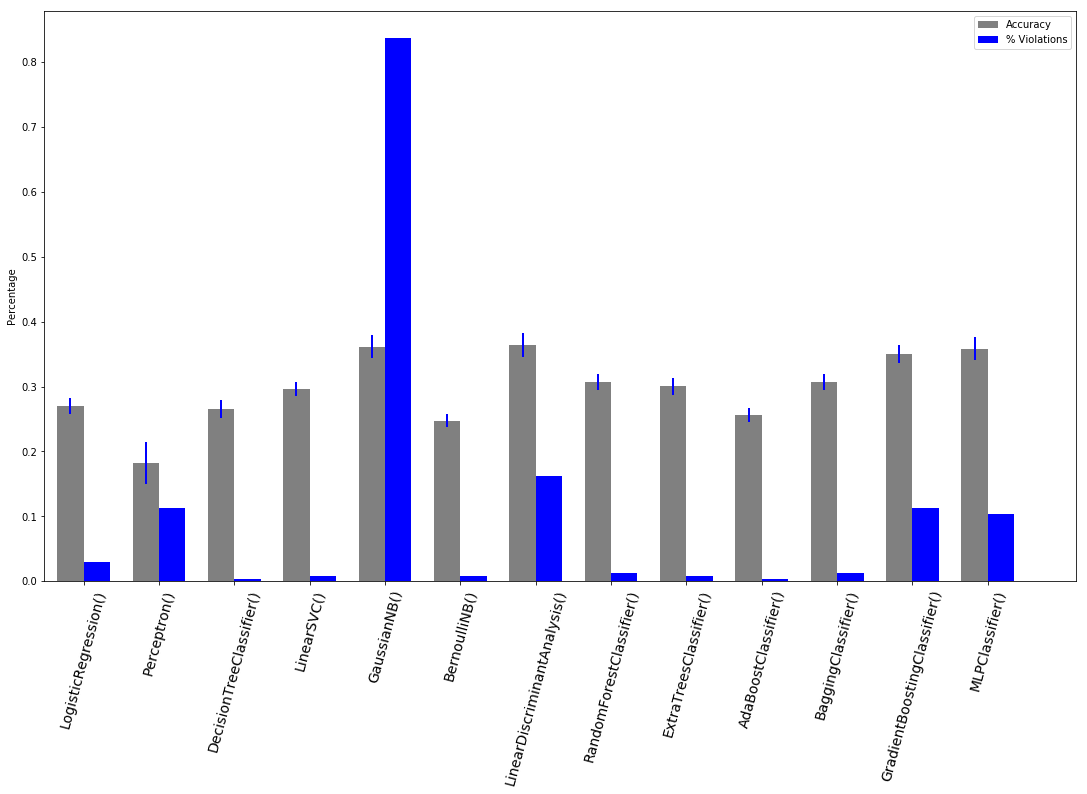

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import roc_auc_score, average_precision_score, mean_squared_error, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd

from pycausal import search as s

def get_CG(df, tetrad):
    tetrad.run(algoId = 'gfci', dfs = df, testId = 'sem-bic', scoreId = 'sem-bic', dataType = 'continuous',
           structurePrior = 1.0, samplePrior = 1.0, maxDegree = -1, maxPathLength = -1, 
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)
    #tetrad.run(algoId = 'gfci', dfs = df, testId = 'bdeu', scoreId = 'bdeu', dataType = 'discrete',
    #       structurePrior = 1.0, samplePrior = 1.0, maxDegree = 3, faithfulnessAssumed = True, verbose = True)


    return tetrad.getTetradGraph()

def get_MB(graph, var, pc):
    parents = set()
    for i in pc.extractTetradGraphEdges(graph):
        if i[-1] == var and i[3:5] == '->':
            parents.add(i[0])
        if i[0] == var and i[3:5] == '->':
            parents.add(i[-1])
    return parents

from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm(java_max_heap_size = '5000M')
tetrad = s.tetradrunner()
def run_models(models, model_names, x, y, num_folds=40):
    violations = np.zeros(len(models))
    violation_mean = np.zeros((len(models), num_folds))
    mean = np.zeros((len(models), num_folds))
    mean2 = np.zeros((len(models), num_folds)) # used to store our secondary metric
    
    skf = StratifiedKFold(n_splits=num_folds)
    fold = 0
    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        for idx, model in enumerate(models):
            model.fit(x_train, y_train)
            original_df = pd.DataFrame(x_test, columns = ['a', 'b', 'c', 'd', 'e', 'f'])

            original_targets = pd.DataFrame(y_test, columns = ['g'])
            original_df = original_df.join(original_targets)
            test_df = pd.DataFrame(x_test, columns = ['a', 'b', 'c', 'd', 'e', 'f'])
            test_targets = pd.DataFrame(model.predict(x_test), columns = ['g'])
            test_df = test_df.join(test_targets)
            #print(get_MB(get_CG(test_df), 'g'))
            print("Error:", model_names[idx], accuracy_score(y_test, model.predict(x_test)))
            
            
            mean[idx][fold] = accuracy_score(y_test, model.predict(x_test))
            mean2[idx][fold] = mean_squared_error(y_test, model.predict(x_test))
            
            setA = get_MB(get_CG(original_df, tetrad), 'g', pc)
            setB = get_MB(get_CG(test_df, tetrad), 'g', pc)
            #assert(setA == {'f'})
            violation_mean[idx][fold] = len(setA.difference(setB)) + len(setB.difference(setA))
            if setA != setB:
                print("Violation:", setA , setB, 'g', pc)
                violations[idx] += 1
            
            #pc.stop_vm()
        fold += 1
    
    print("Violations = ", violations)
    
    metric = []
    metric_err = []
    viol = []
    viol_err = []
    
    #normalize the violations for prettier graphing.
    #also violations are always positive, so just divide by max.
    violation_mean = violation_mean / np.max(violation_mean)
    
    for i in range(len(violations)):
        print("Model_name = ", model_names[i], "Violations = ", violations[i])
        print("Average_violations = ", np.mean(violation_mean[i]), np.std(violation_mean[i]))
        print("Accuracy = ", np.mean(mean[i]), np.std(mean[i]), "MSE = ", np.mean(mean2[i]), np.std(mean2[i]),)
        metric.append(np.mean(mean[i]))
        metric_err.append(np.std(mean[i]))
        viol.append(np.mean(violation_mean[i]))
        
        viol_err.append(np.std(violation_mean[i]))
    print(np.array(metric), 
             np.array(metric_err), 
             np.array(viol), 
             np.array(viol_err))    
    
    bar_plot(model_names, 
             np.array(metric), 
             np.array(metric_err), 
             np.array(viol), 
             np.array(viol_err))
    return 

X = df[['a', 'b', 'c', 'd', 'e', 'f']].values
y = df['g'].values

models = [LogisticRegression(), 
          Perceptron(),  
          DecisionTreeClassifier(),
          LinearSVC(),
          GaussianNB(),
          BernoulliNB(),
          LinearDiscriminantAnalysis(),
          RandomForestClassifier(),
          ExtraTreesClassifier(),
          AdaBoostClassifier(),
          BaggingClassifier(),
          GradientBoostingClassifier(),
          MLPClassifier()
         ]
model_names = ['LogisticRegression()', 
          'Perceptron()',  
          'DecisionTreeClassifier()',
          'LinearSVC()',
          'GaussianNB()',
          'BernoulliNB()',
          'LinearDiscriminantAnalysis()',
          'RandomForestClassifier()',
          'ExtraTreesClassifier()', 
          'AdaBoostClassifier()',
          'BaggingClassifier()',
          'GradientBoostingClassifier()',
          'MLPClassifier()'
         ]

run_models(models,model_names, X,y)